# Aim to compare 
- Linear Regression
- k-Nearest Neighbors Classifier
- Decision Tree Classifier
- Bagged Decision Tree Classifier
- Random Forest Classifier
- Ada Boosting Classifier
- Multinomial Naive Bayes Classifier
- Bernoulli Naive Bayes Classifier

In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV,train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import classification_report, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, BaggingClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay

# Import NLP library
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [3]:
# Read clean CSV that export from EDA process
pod = pd.read_csv('../datasets/print_clean.csv')

In [4]:
# stopword
new_stopwords = stopwords.words('english')
new_stopwords.extend(['https','order','platform','pod', 'printify', 'printful','want','would', 
                      'print', 'on', 'demand', 'printondemand','via','com','anyone','one'])

In [5]:
pod['source'].unique() 

# We set binary value in 'source' earlier
# printify = 0
# printful = 1

array([1, 0])

---

## Preparing process

In [8]:
## Multinomial Naive Bayes Classifier
## Bernoulli Naive Bayes Classifier

In [9]:
# Set X,y
X = pod['title_lemma']  # The title
y = pod['source'] 

In [10]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=42)

In [11]:
# Check shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1360,), (454,), (1360,), (454,))

In [12]:
y_train.value_counts(normalize=True).mul(100).round(2)

source
1    51.47
0    48.53
Name: proportion, dtype: float64

In [13]:
y_test.value_counts(normalize=True).mul(100).round(2)

source
1    51.54
0    48.46
Name: proportion, dtype: float64

In [14]:
# Baseline Accuracy is balance. Class 1 (the majority class) would yield a baseline accuracy of ~51%.

---

## Model Comparsion

In [17]:
classification_models = {
    'logistic regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Bagging': BaggingClassifier(), 
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(algorithm='SAMME')
}

In [18]:
def pipeline_classification_models(X_train, X_test, y_train, y_test, classification_models,n_stop_words):

    results = {}
    
    for name, classification_model in classification_models.items():
        print(f"Training and evaluating model: {name}")
        pipeline = Pipeline([
            ('cv', CountVectorizer(stop_words=n_stop_words)),  
            ('model', classification_model)
        ])
        
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        
        # Evaluate model
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        
        results[name] = {
            'accuracy': accuracy,
            'classification_report': report
        }
        
        # Print results
        print(f"Accuracy for {name}: {accuracy:.4f}")
        print(report)
        print("==========================================================")
    
    return results

In [19]:
results = pipeline_classification_models(X_train, X_test, y_train, y_test, classification_models,new_stopwords)

Training and evaluating model: logistic regression
Accuracy for logistic regression: 0.6079
              precision    recall  f1-score   support

           0       0.59      0.61      0.60       220
           1       0.62      0.61      0.61       234

    accuracy                           0.61       454
   macro avg       0.61      0.61      0.61       454
weighted avg       0.61      0.61      0.61       454

Training and evaluating model: KNN
Accuracy for KNN: 0.5088
              precision    recall  f1-score   support

           0       0.50      0.80      0.61       220
           1       0.56      0.23      0.33       234

    accuracy                           0.51       454
   macro avg       0.53      0.52      0.47       454
weighted avg       0.53      0.51      0.47       454

Training and evaluating model: Decision Tree
Accuracy for Decision Tree: 0.5991
              precision    recall  f1-score   support

           0       0.57      0.71      0.63       220
     

In [20]:
# We don't scale our features and target because the accuracy were dropped 
# Significant the overfitting 
# Experiment with other boosting techniques, 
# such as Gradient Boosting or XGBoost to improve the accuracy

In [21]:
# Multinomial 
# BernoulliNB

#Bernoulli Naive Bayes: Our data
#Word present/absent
#Features: "title_lemma"  , "body_lemma"
#Source: printify and printful have 0/1 variables.

#Multinomial Naive Bayes: when our variables are positive integers.
#Text classification (word counts)
#Features: "etsy" (appears 345 times), "product" (appears 341 times), "shipping" (appears 336 time)
#Counts how many times each word appears

#According to our data is text classification with no weight , we selected multinomial plus 
#and Bernoulli Naive Bayes to compare

In [22]:
# Small datasets (<10,000 samples): 
# Start with max_features = 1,000–5,000. 
# min_df For small datasets: set to 2-5 documents
# max_df 0.7-0.8 to handle repetitive content that number is common approach for social media
# ngram_range (1,3) for hashtags and longer phrases

# Smaller feature sets are usually sufficient for datasets with limited text and vocabulary.

In [23]:
pipe_params = {
    'cvec__max_features': [2_000, 3_000, 4_000, 5_000],
    'cvec__min_df': [2,5],
    'cvec__max_df': [.7, .8],
    'cvec__ngram_range': [(1,3)]
}

In [24]:
nb_models = {
    'MultinomialNB': MultinomialNB(),
    'BernoulliNB': BernoulliNB()}

Train Score for MultinomialNB: 0.7801470588235294
Best Cross-Validation Score for MultinomialNB: 0.5551
Test Accuracy for MultinomialNB: 0.5859
              precision    recall  f1-score   support

           0       0.58      0.54      0.56       220
           1       0.59      0.63      0.61       234

    accuracy                           0.59       454
   macro avg       0.59      0.58      0.58       454
weighted avg       0.59      0.59      0.58       454

Train Score for BernoulliNB: 0.7816176470588235
Best Cross-Validation Score for BernoulliNB: 0.5449
Test Accuracy for BernoulliNB: 0.5859
              precision    recall  f1-score   support

           0       0.58      0.54      0.56       220
           1       0.59      0.63      0.61       234

    accuracy                           0.59       454
   macro avg       0.59      0.58      0.58       454
weighted avg       0.59      0.59      0.59       454



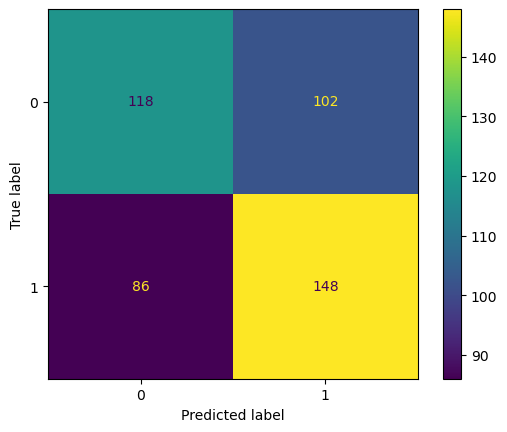

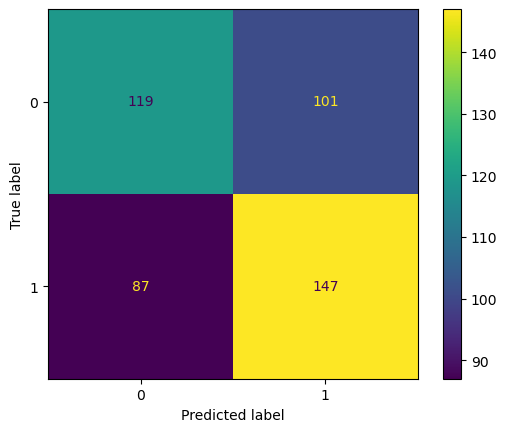

In [25]:
def pipeline_nb_models(X_train, X_test, y_train, y_test, classification_models, n_stop_words, pipe_params):
    results = {}
    for name, nb_model in classification_models.items():  # Iterate over classification_models
        # Define the pipeline with a CountVectorizer and the Naive Bayes model
        pipe = Pipeline([
            ('cvec', CountVectorizer(stop_words=n_stop_words)),  # CountVectorizer with stop words
            ('nb_model', nb_model)  # Naive Bayes model
        ])
        
        # Perform grid search with cross-validation to find the best parameters
        gs = GridSearchCV(pipe,  # The pipeline to optimize
                          param_grid=pipe_params,  # Parameter grid to search over
                          cv=5,  # Number of folds in cross-validation
                          n_jobs=2)   # Data not that big, no need to use all cpu to search the best param
        
        # Fit the grid search to the training data
        gs.fit(X_train, y_train)

        # Get results from the grid search
        best_score = gs.best_score_  # Best cross-validation score
        train_score = gs.score(X_train, y_train)  # Training set score with the best parameters
        test_score = gs.score(X_test, y_test)  # Test set score with the best parameters
        y_preds = gs.predict(X_test)  # Predictions on the test set
        cm = confusion_matrix(y_test, y_preds)  # Confusion matrix

        # Store results
        results[name] = {
            'best_score': best_score,
            'train_score': train_score,
            'test_score': test_score,
            'confusion_matrix': cm,
            'classification_report': classification_report(y_test, y_preds)
        }

        # Print results
        print(f"Train Score for {name}: {train_score}")
        print(f"Best Cross-Validation Score for {name}: {best_score:.4f}")
        print(f"Test Accuracy for {name}: {test_score:.4f}")
        print(classification_report(y_test, y_preds))
        print("==========================================================")

        # Plot confusion matrix
        ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gs.classes_).plot()

    return results


results = pipeline_nb_models(X_train, X_test, y_train, y_test, nb_models, new_stopwords, pipe_params)


In [26]:
# Key Takeaway
# Both models show moderate performance with signs of overfitting (Train score > test score). 
# Neither model achieves high accuracy or perfectly balanced precision and recall, especially for class 0.

In [27]:
# Recap : 
# printify = 0
# printful = 1
#True negatives are things we correctly predict to be negative.
#In this case, since printful = 1, a true negative means I correctly predict something is a printify post.

In [28]:
#False positives are things we falsely predict to be positive.
#In this case, since printful = 1, a false positive means I incorrectly predict something is a tweet 
#(when it's really a #In this case, since printful = 1, 
#a true negative means I correctly predict something is a printify post)